In [1]:
import os
import cv2
import matplotlib.pyplot as plt

# Specify the path to your dataset folder in Kaggle's input folder
dataset_folder = '/kaggle/input/graphology-dataset/images/images'  # Replace with your dataset folder path

# Loop over all images in the dataset folder
for image_filename in os.listdir(dataset_folder):
    if image_filename.endswith('.png') or image_filename.endswith('.jpg'):
        # Load each image
        image_path = os.path.join(dataset_folder, image_filename)
        image = cv2.imread(image_path)

        # Convert the image to grayscale
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        # Apply binary thresholding to make the image binary (black and white)
        _, binary_image = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY_INV)



In [2]:

# Create a directory in Kaggle's output folder to save cropped character images
output_folder = '/kaggle/working/segmented_characters'
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Counter to track the number of processed images
image_count = 0
max_images = 30  

# Loop through the dataset images to perform segmentation
for image_filename in os.listdir(dataset_folder):
    if image_filename.endswith('.png') or image_filename.endswith('.jpg'):
        # Break the loop after processing 30 images
        if image_count >= max_images:
            break
        
        image_path = os.path.join(dataset_folder, image_filename)
        image = cv2.imread(image_path)

        # Preprocessing: Grayscale and binary threshold
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        _, binary_image = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY_INV)

        # Contour detection
        contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        # Loop through contours and crop characters
        character_count = 0
        for contour in contours:
            x, y, w, h = cv2.boundingRect(contour)
            if w > 10 and h > 10:  # Filter small contours
                # Crop character
                character_image = binary_image[y:y + h, x:x + w]

                # Save cropped character image
                character_image_path = os.path.join(output_folder, f'{image_filename}_char_{character_count}.png')
                cv2.imwrite(character_image_path, character_image)
                character_count += 1

        image_count += 1  # Increment image counter
        print(f"Processed {image_filename} - Extracted {character_count} characters.")


Processed 207-0.png - Extracted 145 characters.
Processed 373-0.png - Extracted 121 characters.
Processed 462-0.png - Extracted 56 characters.
Processed 670-3.png - Extracted 194 characters.
Processed 163-0.png - Extracted 81 characters.
Processed 588-1.png - Extracted 87 characters.
Processed 348-5.png - Extracted 106 characters.
Processed 109-1.png - Extracted 144 characters.
Processed 000-44.png - Extracted 119 characters.
Processed 275-0.png - Extracted 111 characters.
Processed 371-0.png - Extracted 146 characters.
Processed 277-0.png - Extracted 152 characters.
Processed 344-0.png - Extracted 93 characters.
Processed 000-50.png - Extracted 110 characters.
Processed 552-7.png - Extracted 151 characters.
Processed 405-0.png - Extracted 162 characters.
Processed 036-0.png - Extracted 112 characters.
Processed 454-0.png - Extracted 155 characters.
Processed 351-0.png - Extracted 202 characters.
Processed 346-7.png - Extracted 62 characters.
Processed 128-2.png - Extracted 152 charact

In [3]:

# Folder paths
output_folder = '/kaggle/working/segmented_characters'  # Assuming you already have segmented characters here
normalized_folder = '/kaggle/working/normalized_characters'

# Create directory for saving normalized characters
if not os.path.exists(normalized_folder):
    os.makedirs(normalized_folder)

# Define the target size for normalization (28x28 pixels)
normalized_size = (28, 28)

# Loop through the cropped character images and normalize them
for character_filename in os.listdir(output_folder):
    character_path = os.path.join(output_folder, character_filename)
    
    # Load the character image in grayscale
    character_image = cv2.imread(character_path, cv2.IMREAD_GRAYSCALE)
    
    # Resize the character to the target size
    resized_character = cv2.resize(character_image, normalized_size)
    
    # Save the normalized character image
    normalized_character_path = os.path.join(normalized_folder, character_filename)
    cv2.imwrite(normalized_character_path, resized_character)

print(f"All characters have been normalized and saved in {normalized_folder}.")


All characters have been normalized and saved in /kaggle/working/normalized_characters.


In [4]:


# Folder paths
normalized_folder = '/kaggle/working/normalized_characters'  # Folder with normalized characters
features_folder = '/kaggle/working/extracted_features'  # Folder to save the extracted features

# Create directory for saving extracted features
if not os.path.exists(features_folder):
    os.makedirs(features_folder)

# Loop through the normalized character images and extract features
for character_filename in os.listdir(normalized_folder):
    character_path = os.path.join(normalized_folder, character_filename)
    
    # Load the normalized character image in grayscale
    character_image = cv2.imread(character_path, cv2.IMREAD_GRAYSCALE)
    
    # Apply Canny edge detection
    edges = cv2.Canny(character_image, 100, 200)
    
    # Save the edge-detected feature image
    edges_image_path = os.path.join(features_folder, character_filename)
    cv2.imwrite(edges_image_path, edges)

print(f"Edge-detected features are saved in {features_folder}.")


Edge-detected features are saved in /kaggle/working/extracted_features.


In [5]:
import numpy as np

# Folder paths
features_folder = '/kaggle/working/extracted_features'  # Folder with edge-detected character images
labeled_folder = '/kaggle/working/labeled_features'     # Folder to save labeled feature images

# Create directory for saving labeled feature images
if not os.path.exists(labeled_folder):
    os.makedirs(labeled_folder)

# Threshold values (placeholders, adjust these based on real dataset)
slant_threshold = 10
low_pressure_threshold = 1500
capital_letter_threshold = 50
horizontal_stroke_min_threshold = 500  # Minimum strokes for Humor
horizontal_stroke_max_threshold = 30000  # Max threshold to avoid over-detection
disconnect_threshold = 30  # Adjust this to better detect disconnections
small_script_threshold = 40  # Set for detecting small scripts

# Function to classify handwriting traits based on extracted features
def classify_handwriting_trait(character_image):
    # Initialize trait variable
    trait = 'Unclassified'
    
    height, width = character_image.shape

    # Rule 1: Right slant, extended strokes -> Hospitality
    contours, _ = cv2.findContours(character_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        if w > h and w > slant_threshold:  # Wide character, possibly right slant
            trait = 'Hospitality'

    # Rule 2: Small script, simplification of capital 'I' -> Humility
    if height < small_script_threshold and 'I' in character_filename:
        trait = 'Humility'

    # Rule 3: Wavy horizontal strokes -> Humor
    # Refine humor detection by limiting the number of detected horizontal strokes
    horizontal_strokes = np.sum(np.abs(np.diff(character_image, axis=1)))
    if horizontal_strokes > horizontal_stroke_min_threshold and horizontal_strokes < horizontal_stroke_max_threshold:
        trait = 'Humor'

    # Rule 4: High dots on 'i' and 't' -> Imagination
    if len(contours) == 1 and h > 0.8 * height:  # Example condition for tall characters
        trait = 'Imagination'

    # Rule 5: Right slant, angles, wide script with low pressure -> Impatience
    if w > h and np.sum(character_image) < low_pressure_threshold:
        trait = 'Impatience'

    # Rule 6: Curves, light pressure -> Inactivity
    edges_detected = np.sum(character_image)
    if edges_detected < low_pressure_threshold:
        trait = 'Inactivity'

    # Rule 7: Large capitals, angles, first strokes of 'm' and 'w' -> Independence
    if width > capital_letter_threshold:
        trait = 'Independence'

    # Rule 8: Disconnected script, upright script, good spacing -> Individualism
    # Check for disconnected parts in the character using contours
    disconnections = 0
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        if w > 0 and h > 0 and w < disconnect_threshold and h < disconnect_threshold:
            disconnections += 1
    
    if disconnections > 5:  # Adjust this condition based on real data
        trait = 'Individualism'

    # Rule 9: Right slant, low pressure with irregular script -> Initiative
    if w > h and np.sum(character_image) < low_pressure_threshold and w > slant_threshold:
        trait = 'Initiative'

    return trait

# Loop through the edge-detected character images and label them
for character_filename in os.listdir(features_folder):
    character_path = os.path.join(features_folder, character_filename)
    
    # Load the edge-detected character image in grayscale
    character_image = cv2.imread(character_path, cv2.IMREAD_GRAYSCALE)
    
    # Classify the character based on its features
    handwriting_trait = classify_handwriting_trait(character_image)
    
    # Save the labeled character image
    labeled_character_path = os.path.join(labeled_folder, f'{handwriting_trait}_{character_filename}')
    cv2.imwrite(labeled_character_path, character_image)

    print(f"Labeled {character_filename} as {handwriting_trait}.")

print(f"All features have been labeled and saved in {labeled_folder}.")


Labeled 631-0.png_char_80.png as Humor.
Labeled 351-0.png_char_142.png as Humor.
Labeled 028-0.png_char_119.png as Individualism.
Labeled 275-0.png_char_91.png as Humor.
Labeled 377-0.png_char_50.png as Humor.
Labeled 335-7.png_char_117.png as Humor.
Labeled 670-3.png_char_34.png as Individualism.
Labeled 670-3.png_char_140.png as Humor.
Labeled 371-0.png_char_100.png as Imagination.
Labeled 405-0.png_char_50.png as Humor.
Labeled 351-0.png_char_198.png as Individualism.
Labeled 028-0.png_char_93.png as Individualism.
Labeled 207-0.png_char_25.png as Individualism.
Labeled 373-0.png_char_14.png as Humor.
Labeled 631-0.png_char_184.png as Humor.
Labeled 028-0.png_char_117.png as Humor.
Labeled 351-0.png_char_12.png as Humor.
Labeled 377-0.png_char_37.png as Humor.
Labeled 207-0.png_char_96.png as Unclassified.
Labeled 631-0.png_char_18.png as Individualism.
Labeled 237-0.png_char_129.png as Unclassified.
Labeled 346-7.png_char_46.png as Individualism.
Labeled 207-0.png_char_135.png as U

In [6]:
import numpy as np
import os
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.optimizers import Adam
from sklearn.utils import class_weight
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.layers import BatchNormalization

# Folder containing the labeled character images
labeled_folder = '/kaggle/working/labeled_features'

# Prepare lists to store images (features) and labels
X = []
y = []

# Load the labeled character images and their labels
for image_filename in os.listdir(labeled_folder):
    image_path = os.path.join(labeled_folder, image_filename)
    
    # Load the image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # Normalize the pixel values to [0, 1]
    image = image / 255.0
    
    # Append the image data to X
    X.append(image)
    
    # Extract the label from the filename (assuming the label is part of the filename, e.g., 'char_1_Humor.png')
    label = image_filename.split('_')[-1].replace('.png', '')  # Extracts the trait label
    y.append(label)

# Convert the lists to numpy arrays
X = np.array(X)
X = X.reshape(-1, 28, 28, 1)  # Reshape for CNN input (assuming 28x28 pixel images, 1 channel)

# Encode the labels (convert strings to integers)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Step 6.1: Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=30,         # Increased rotation range
    width_shift_range=0.2,     # Increased horizontal shift
    height_shift_range=0.2,    # Increased vertical shift
    zoom_range=0.3,            # Increased zoom
    shear_range=0.3,           # Increased shear
    fill_mode='nearest'        # Filling missing pixels
)


# Fit the data generator on the training data
datagen.fit(X_train)

# Step 6.2: Define the CNN Model with more layers and dropout
# Example of adding more layers
model = Sequential()

# Convolutional layer with 32 filters
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add more convolutional layers
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Dropout layer to reduce overfitting
model.add(Dropout(0.5))

# Flatten the 2D output for the dense layer
model.add(Flatten())

# Dense layer with 256 neurons
model.add(Dense(256, activation='relu'))

# Dropout to prevent overfitting
model.add(Dropout(0.5))

# Output layer for multi-class classification
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


# Step 6.3: Model Checkpoint and Early Stopping
# Save the best model during training using validation accuracy
checkpoint = ModelCheckpoint('/kaggle/working/best_model.keras', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)

# Stop training if validation accuracy doesn't improve for 3 epochs
early_stopping = EarlyStopping(monitor='val_loss', patience=3, mode='min', verbose=1)

# Compute class weights correctly
class_weights = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)

# Convert the result to a dictionary required by the model's fit method
class_weights_dict = dict(enumerate(class_weights))

# Step 6.4: Train the CNN Model using data augmentation
def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * 0.1  # Reduce learning rate by a factor of 10 after 10 epochs

lr_scheduler = LearningRateScheduler(scheduler)

# Add to callbacks during model training
history = model.fit(datagen.flow(X_train, y_train, batch_size=32),
                    epochs=20,
                    validation_data=(X_test, y_test),
                    class_weight=class_weights_dict,
                    callbacks=[checkpoint, early_stopping, lr_scheduler])

# Step 6.5: Evaluate the Best Model on Test Data
best_model = model  # By default, the model is the best one saved unless early stopping happens
test_loss, test_accuracy = best_model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1725770038.844741     118 service.cc:145] XLA service 0x7b7f04003960 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1725770038.844788     118 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1725770038.844794     118 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


 14/105 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.0000e+00 - loss: 8.5472

I0000 00:00:1725770044.761643     118 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


104/105 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.0031 - loss: 7.7485
Epoch 1: val_accuracy improved from -inf to 0.00600, saving model to /kaggle/working/best_model.keras
105/105 ━━━━━━━━━━━━━━━━━━━━ 14s 62ms/step - accuracy: 0.0031 - loss: 7.7491 - val_accuracy: 0.0060 - val_loss: 5.5992 - learning_rate: 0.0010
Epoch 2/20
 98/105 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.0051 - loss: 7.5190
Epoch 2: val_accuracy did not improve from 0.00600
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.0051 - loss: 7.5172 - val_accuracy: 0.0048 - val_loss: 5.5777 - learning_rate: 0.0010
Epoch 3/20
102/105 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.0069 - loss: 7.4913
Epoch 3: val_accuracy did not improve from 0.00600
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.0069 - loss: 7.4869 - val_accuracy: 0.0048 - val_loss: 5.5705 - learning_rate: 0.0010
Epoch 4/20
 98/105 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.0082 - loss: 7.4815
Epoch 4: val_accuracy did not im

In [7]:
import numpy as np
import os
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.optimizers import Adam
from sklearn.utils import class_weight
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.regularizers import l2
from collections import Counter

# Folder containing the labeled character images
labeled_folder = '/kaggle/working/labeled_features'

# Prepare lists to store images (features) and labels
X = []
y = []

# Load the labeled character images and their labels
for image_filename in os.listdir(labeled_folder):
    image_path = os.path.join(labeled_folder, image_filename)
    
    # Load the image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # Normalize the pixel values to [0, 1]
    image = image / 255.0
    
    # Append the image data to X
    X.append(image)
    
    # Extract the label from the filename (assuming the label is part of the filename, e.g., 'char_1_Humor.png')
    label = image_filename.split('_')[-1].replace('.png', '')  # Extracts the trait label
    y.append(label)

# Convert the lists to numpy arrays
X = np.array(X)
X = X.reshape(-1, 28, 28, 1)  # Reshape for CNN input (assuming 28x28 pixel images, 1 channel)

# Encode the labels (convert strings to integers)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Check the class distribution
label_counts = Counter(y)
print("Label distribution:", label_counts)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Data Augmentation with more aggressive transformations
datagen = ImageDataGenerator(
    rotation_range=40,         # More aggressive rotation
    width_shift_range=0.3,     # Increased horizontal shift
    height_shift_range=0.3,    # Increased vertical shift
    zoom_range=0.4,            # Increased zoom
    shear_range=0.4,           # Increased shear
    horizontal_flip=True,      # Horizontal flip
    fill_mode='nearest'        # Filling missing pixels
)

# Fit the data generator on the training data
datagen.fit(X_train)

# Step 6.2: Define the CNN Model with regularization and dropout
model = Sequential()

# Convolutional layer with 32 filters
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add more convolutional layers
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Dropout layer to reduce overfitting
model.add(Dropout(0.5))

# Flatten the 2D output for the dense layer
model.add(Flatten())

# Dense layer with 256 neurons, with L2 regularization
model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.01)))

# Dropout to prevent overfitting
model.add(Dropout(0.5))

# Output layer for multi-class classification
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

# Compile the model with a lower learning rate
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Step 6.3: Model Checkpoint and Early Stopping
# Save the best model during training using validation accuracy
checkpoint = ModelCheckpoint('/kaggle/working/best_model.keras', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)

# Stop training if validation accuracy doesn't improve for 3 epochs
early_stopping = EarlyStopping(monitor='val_loss', patience=3, mode='min', verbose=1)

# Compute class weights correctly
class_weights = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)

# Convert the result to a dictionary required by the model's fit method
class_weights_dict = dict(enumerate(class_weights))

# Step 6.4: Train the CNN Model using data augmentation
def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * 0.1  # Reduce learning rate by a factor of 10 after 10 epochs

lr_scheduler = LearningRateScheduler(scheduler)

# Add to callbacks during model training
history = model.fit(datagen.flow(X_train, y_train, batch_size=32),
                    epochs=30,  # Increase the number of epochs for better training
                    validation_data=(X_test, y_test),
                    class_weight=class_weights_dict,
                    callbacks=[checkpoint, early_stopping, lr_scheduler])

# Step 6.5: Evaluate the Best Model on Test Data
best_model = model  # By default, the model is the best one saved unless early stopping happens
test_loss, test_accuracy = best_model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


Label distribution: Counter({'38': 30, '26': 30, '21': 30, '43': 30, '37': 30, '20': 30, '16': 30, '44': 30, '17': 30, '52': 30, '41': 30, '18': 30, '51': 30, '31': 30, '0': 30, '2': 30, '54': 30, '15': 30, '34': 30, '42': 30, '35': 30, '10': 30, '22': 30, '29': 30, '30': 30, '27': 30, '48': 30, '32': 30, '5': 30, '36': 30, '3': 30, '4': 30, '33': 30, '46': 30, '28': 30, '50': 30, '23': 30, '53': 30, '7': 30, '24': 30, '49': 30, '19': 30, '12': 30, '8': 30, '6': 30, '9': 30, '11': 30, '40': 30, '1': 30, '39': 30, '25': 30, '13': 30, '45': 30, '55': 30, '47': 30, '14': 30, '60': 29, '57': 29, '58': 29, '56': 29, '59': 29, '61': 29, '62': 28, '76': 27, '63': 27, '66': 27, '78': 27, '67': 27, '77': 27, '73': 27, '79': 27, '65': 27, '72': 27, '74': 27, '64': 27, '70': 27, '69': 27, '68': 27, '80': 27, '71': 27, '75': 27, '85': 26, '84': 26, '82': 26, '83': 26, '81': 26, '86': 26, '90': 25, '92': 25, '87': 25, '91': 25, '89': 25, '88': 25, '96': 24, '98': 24, '103': 24, '101': 24, '105': 24

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 95/105 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.0073 - loss: 9.9428
Epoch 1: val_accuracy improved from -inf to 0.00719, saving model to /kaggle/working/best_model.keras
105/105 ━━━━━━━━━━━━━━━━━━━━ 11s 56ms/step - accuracy: 0.0071 - loss: 9.9282 - val_accuracy: 0.0072 - val_loss: 7.2477 - learning_rate: 1.0000e-04
Epoch 2/30
 98/105 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.0043 - loss: 9.3896
Epoch 2: val_accuracy did not improve from 0.00719
105/105 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.0044 - loss: 9.3929 - val_accuracy: 0.0036 - val_loss: 7.1656 - learning_rate: 1.0000e-04
Epoch 3/30
 98/105 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.0058 - loss: 9.2719
Epoch 3: val_accuracy did not improve from 0.00719
105/105 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.0060 - loss: 9.2684 - val_accuracy: 0.0048 - val_loss: 7.0826 - learning_rate: 1.0000e-04
Epoch 4/30
 98/105 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.0070 - loss: 9.2320
Epoch 4: val_accurac

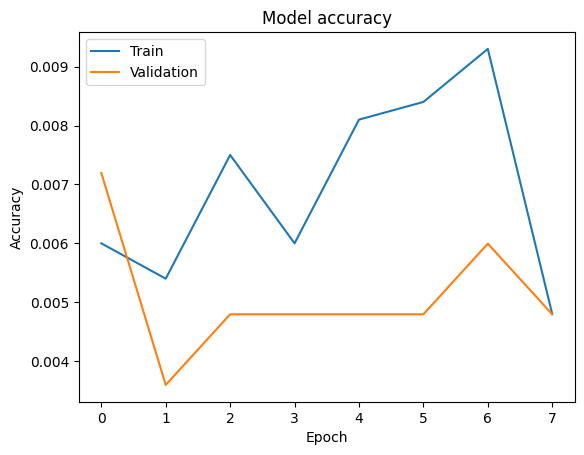

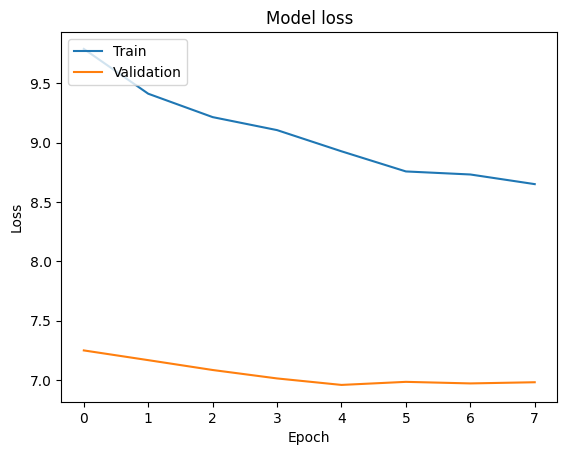

In [8]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 520ms/step


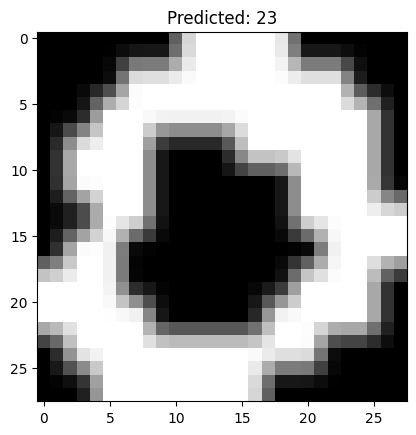

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


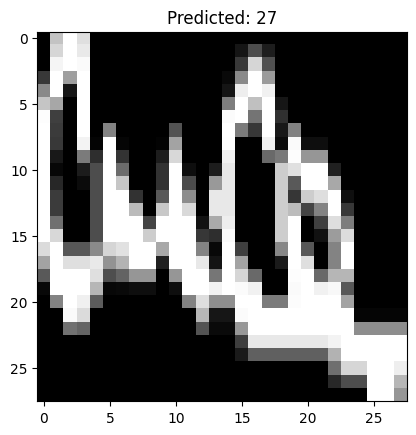

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


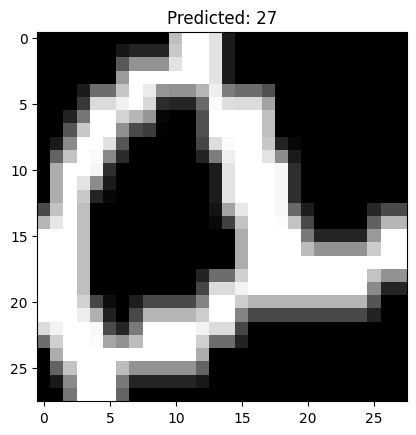

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


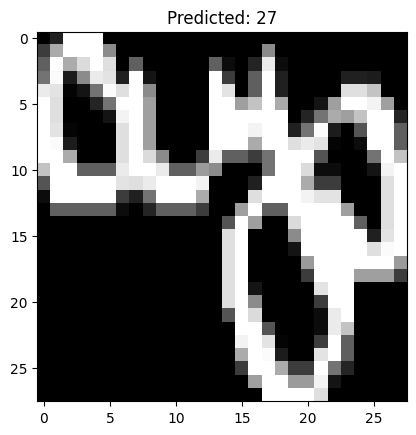

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


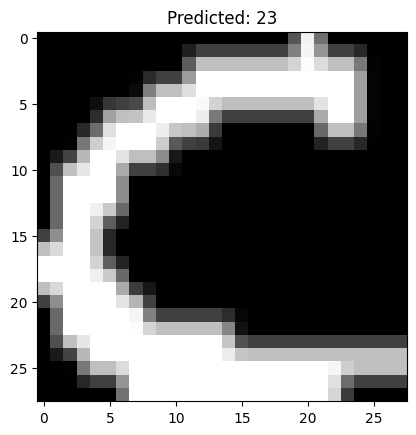

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


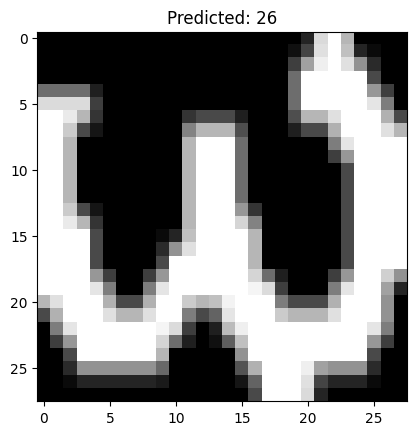

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


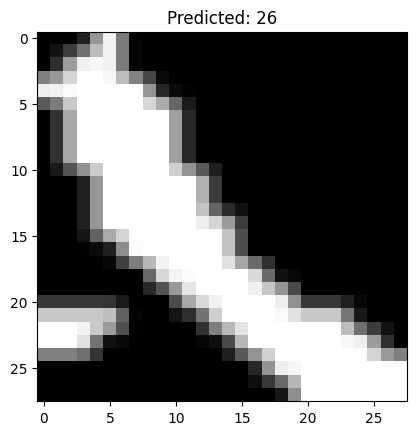

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


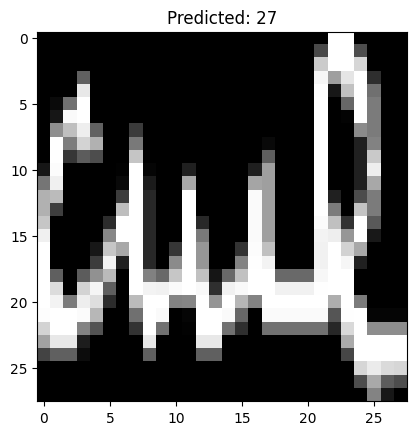

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


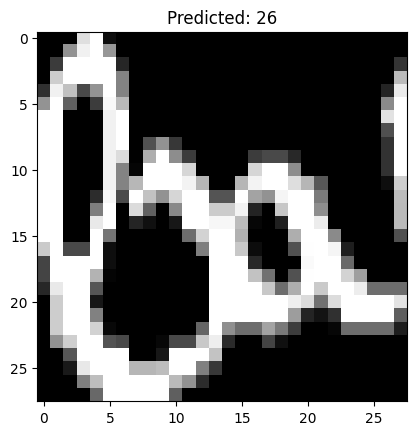

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


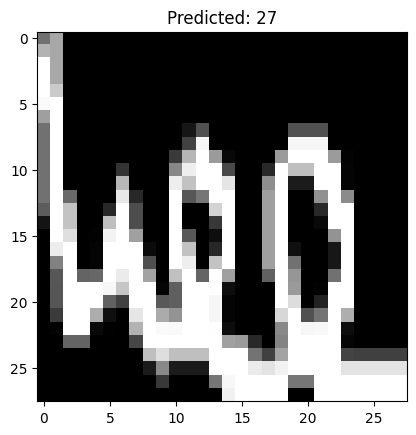

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


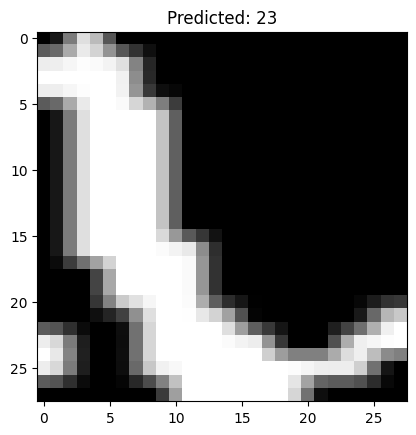

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


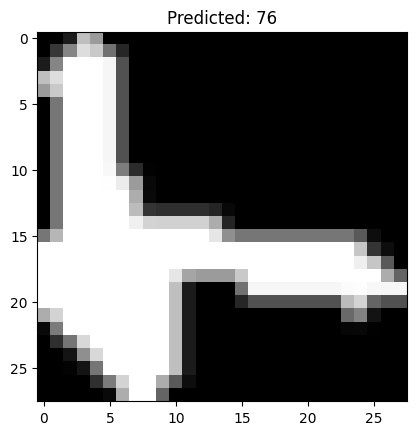

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


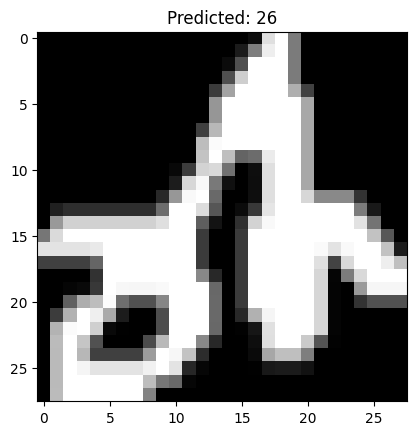

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


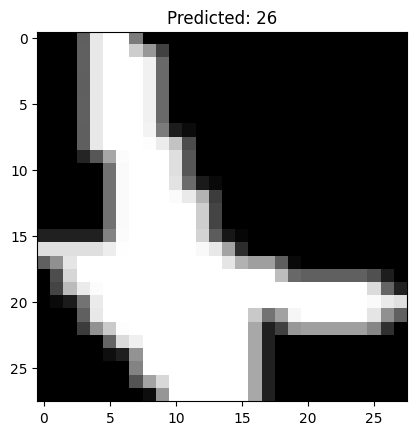

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


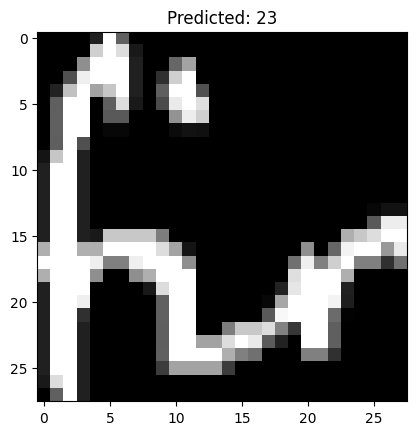

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


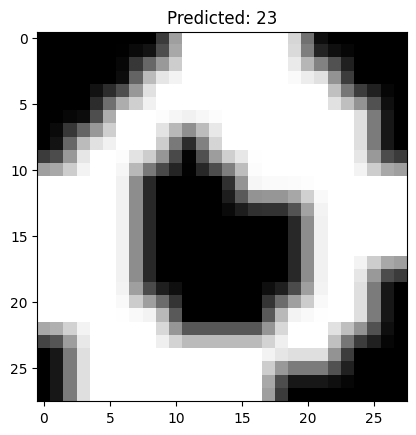

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


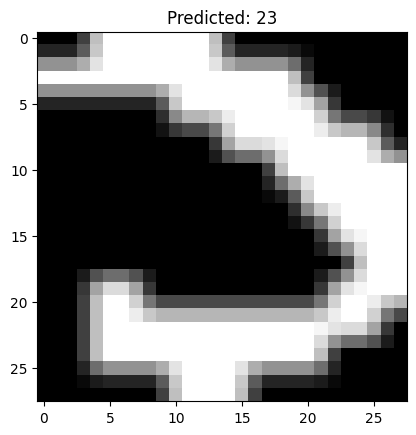

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


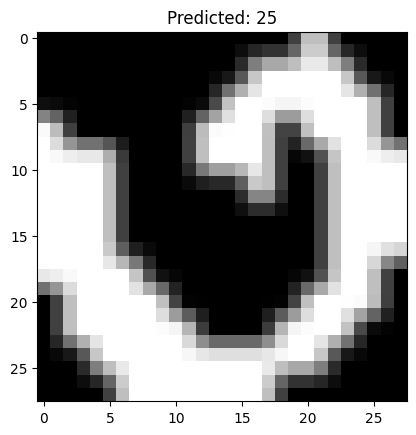

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


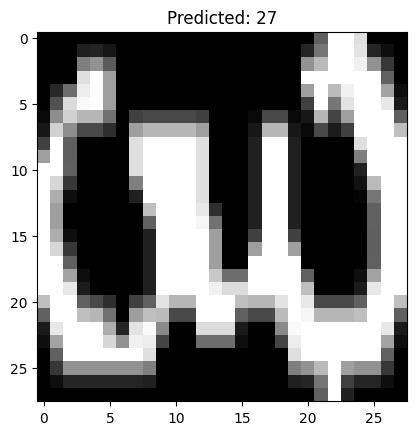

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


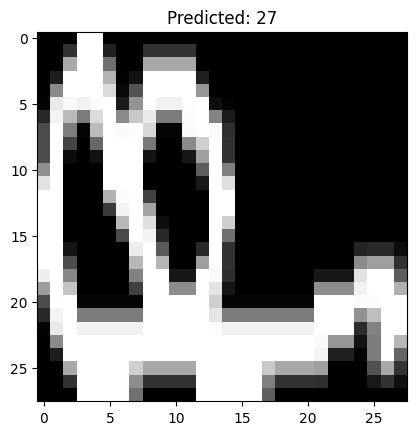

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


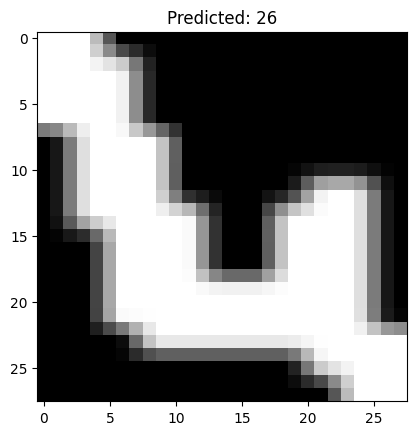

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


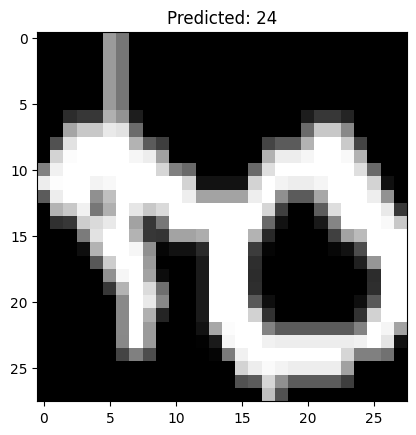

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


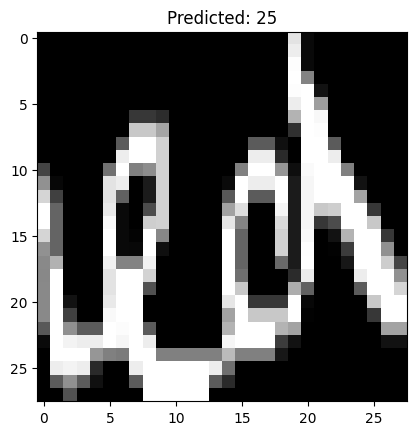

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


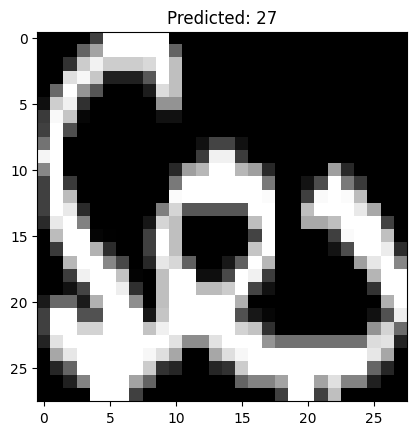

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


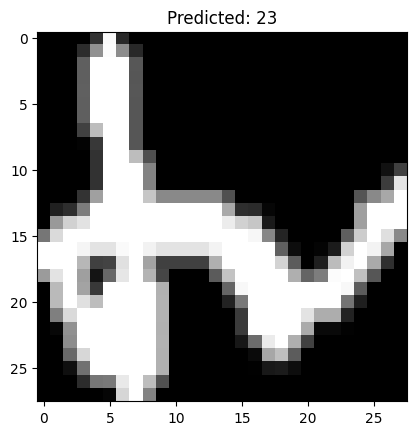

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


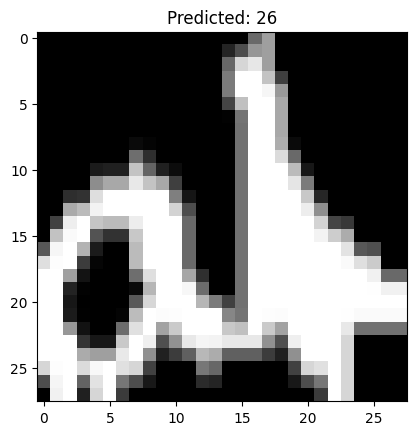

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


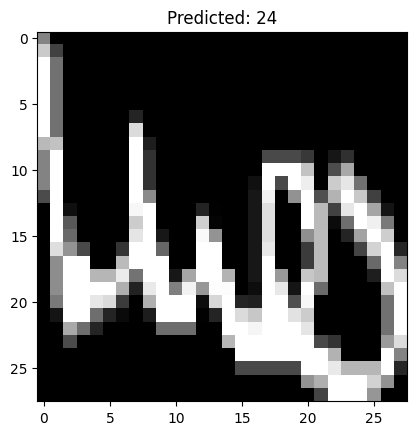

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


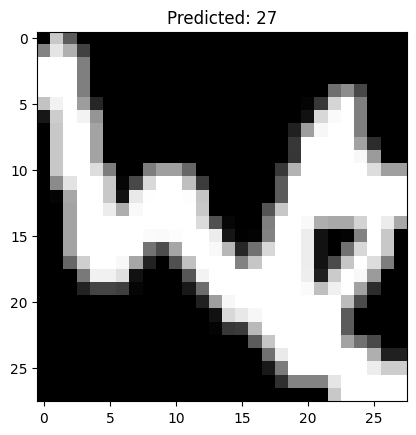

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


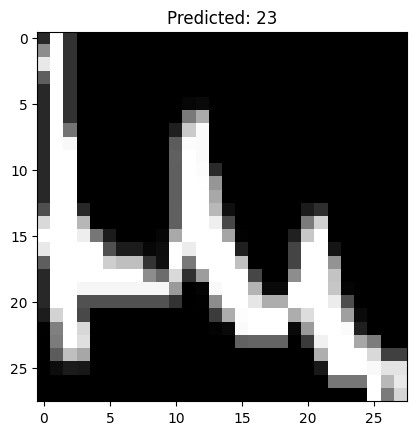

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


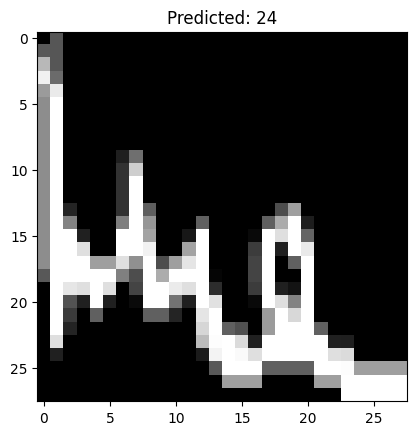

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


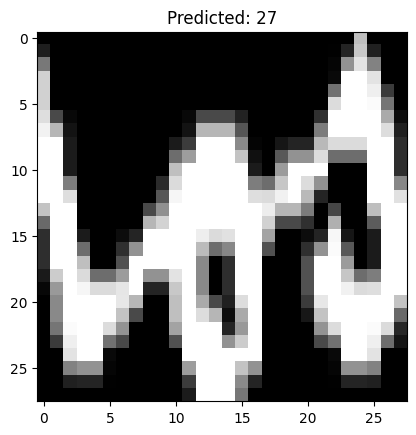

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


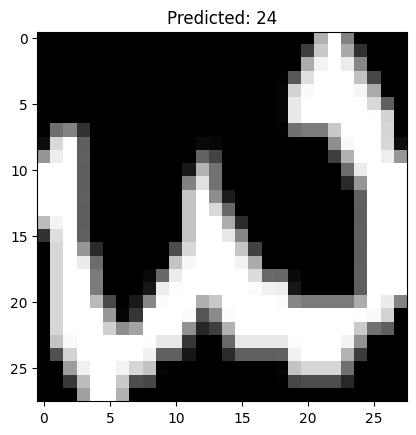

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


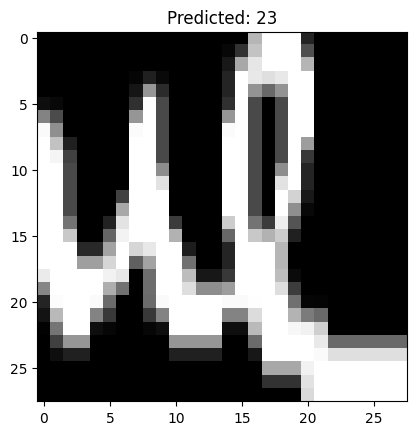

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


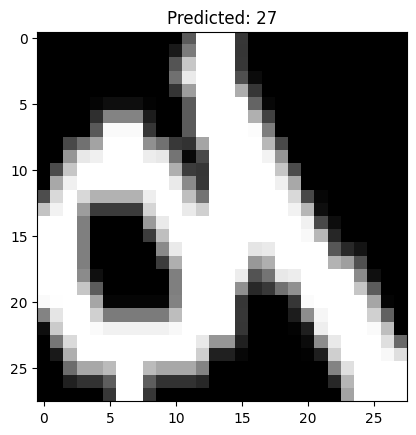

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


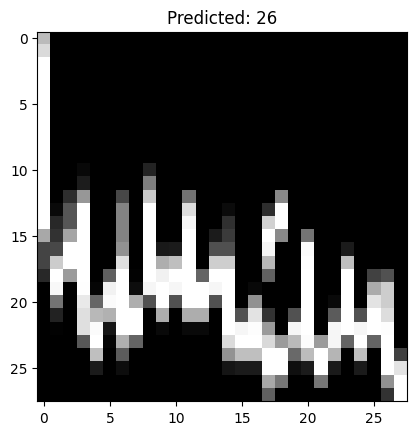

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


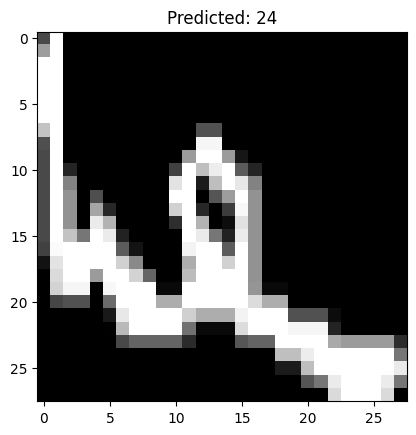

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


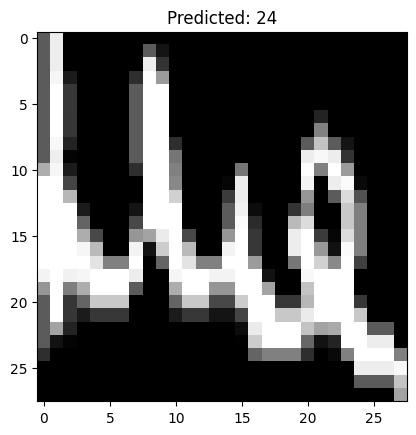

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


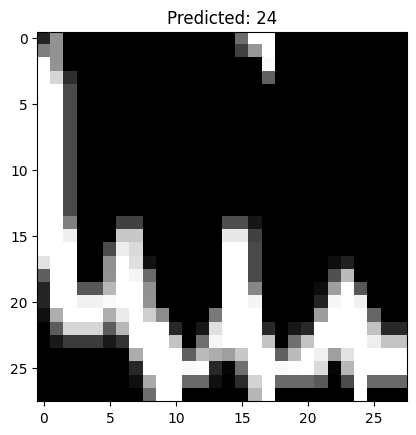

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


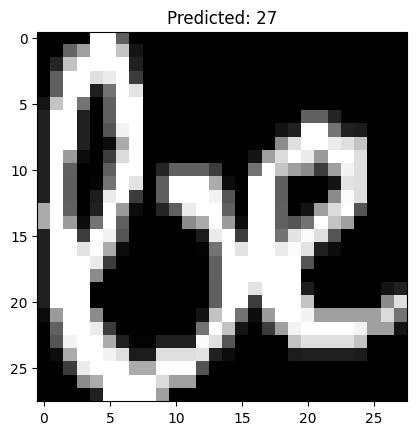

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


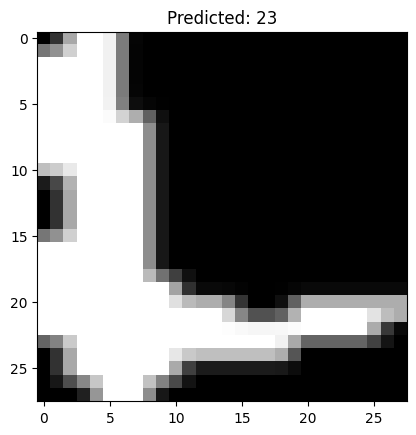

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


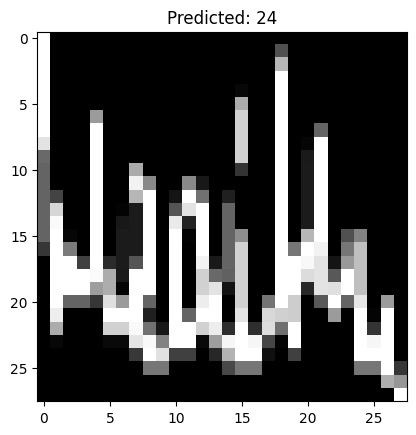

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


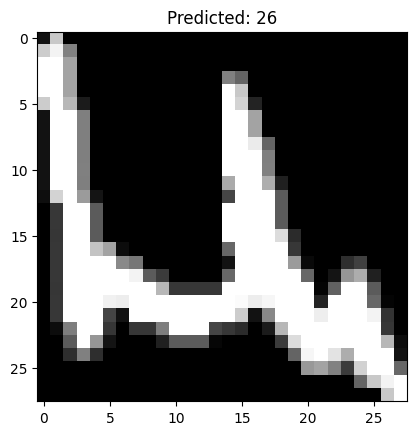

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


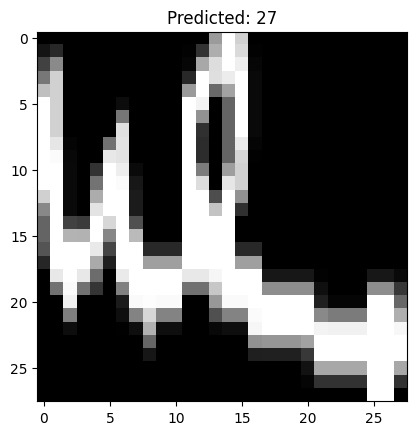

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


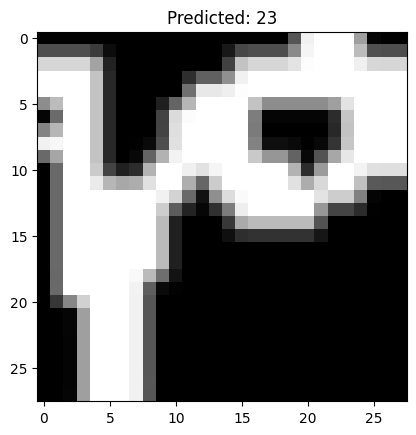

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


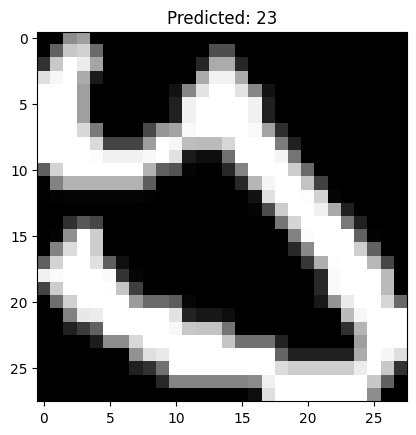

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


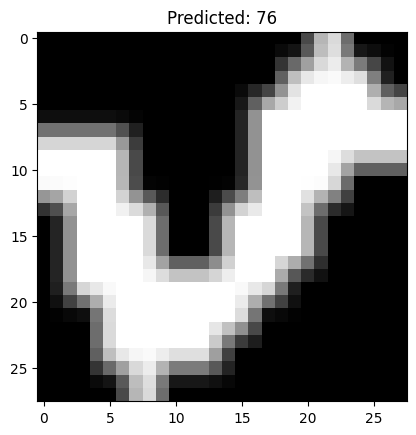

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


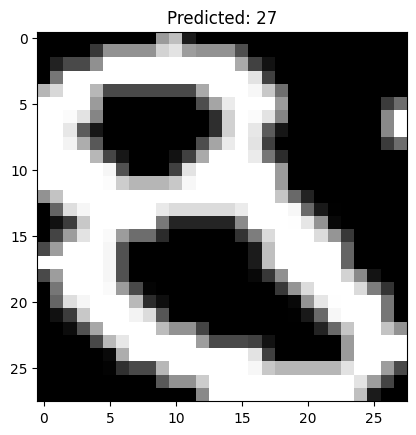

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


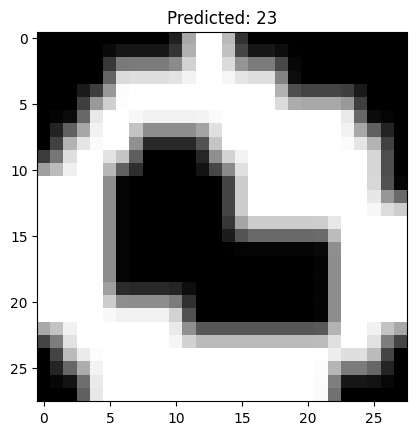

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


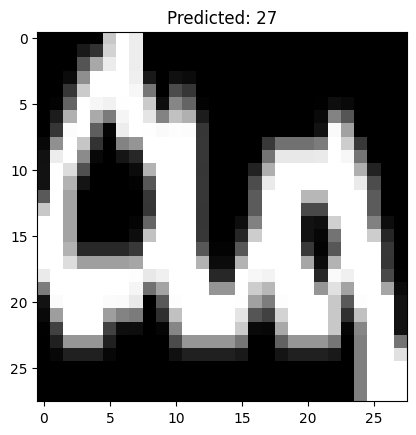

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


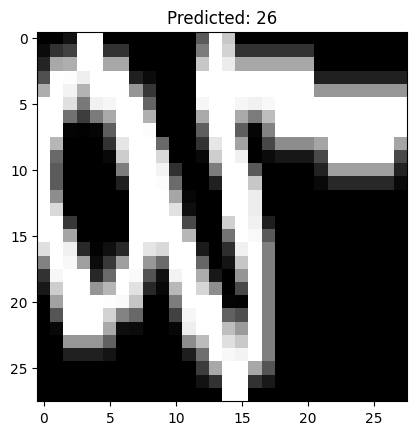

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


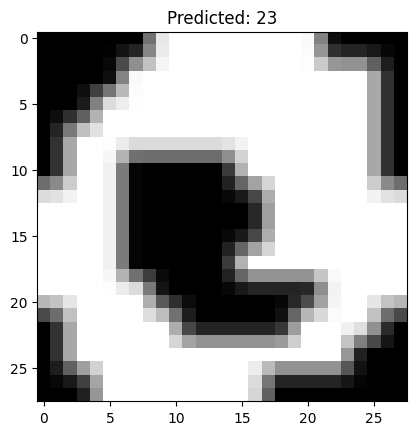

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


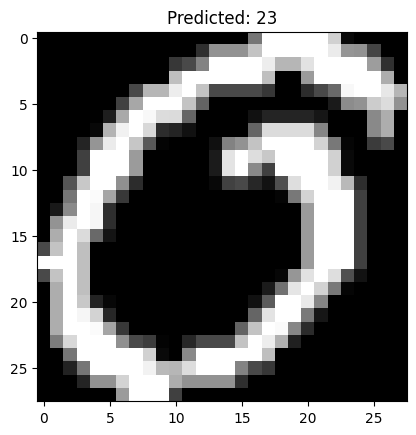

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


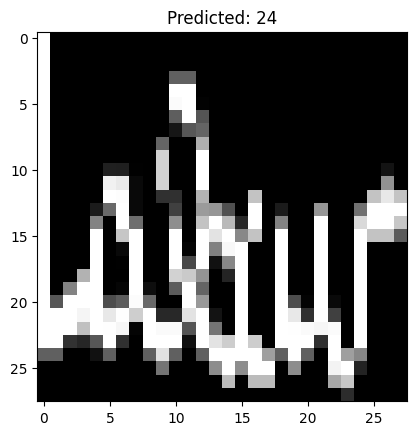

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


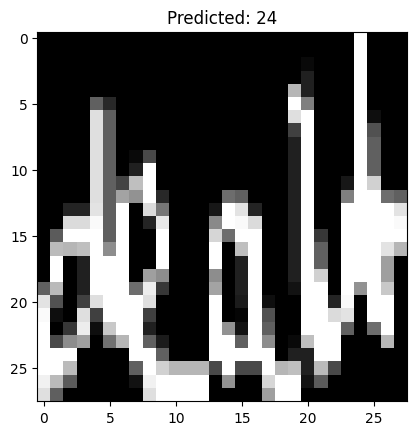

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


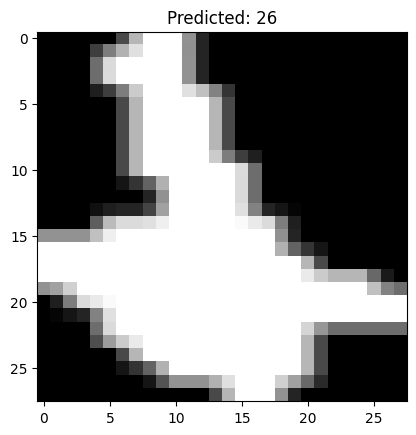

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


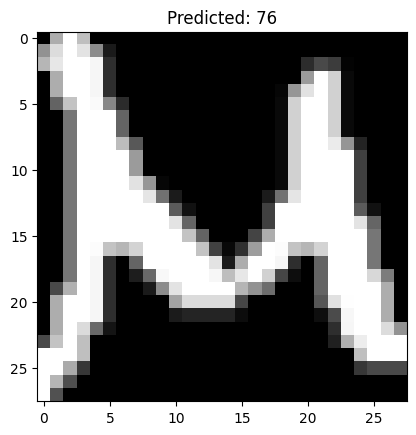

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


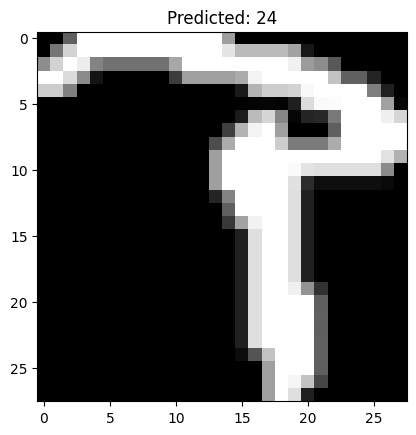

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


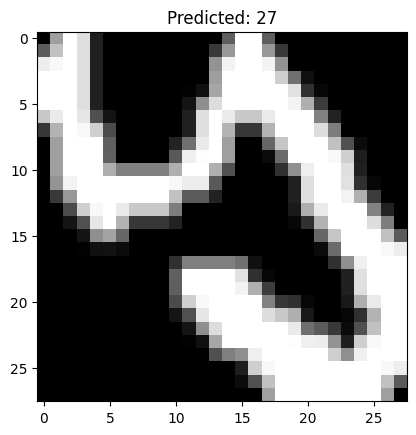

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


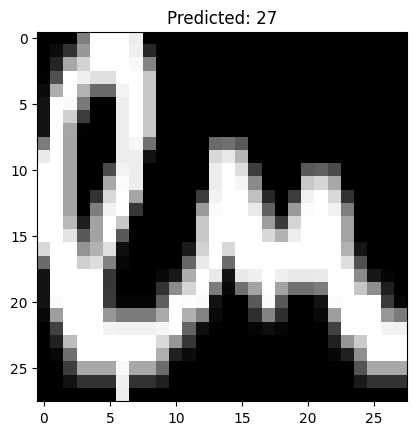

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


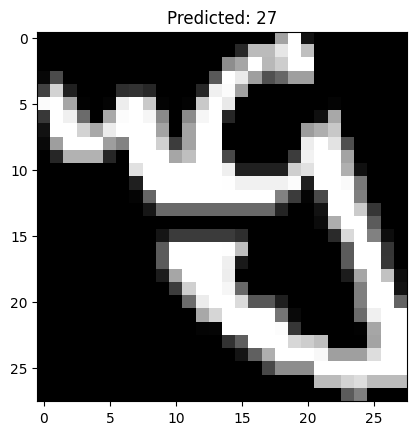

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


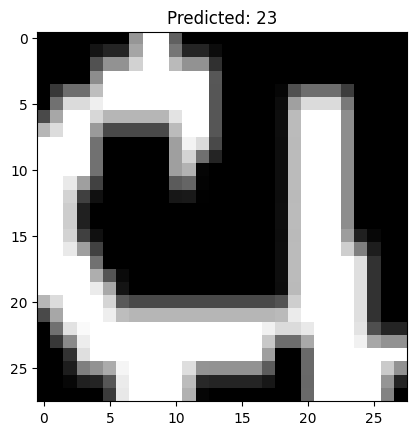

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


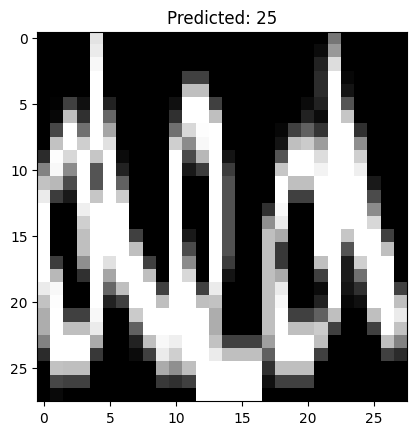

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


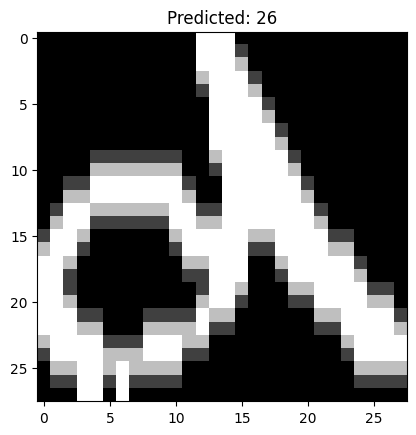

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


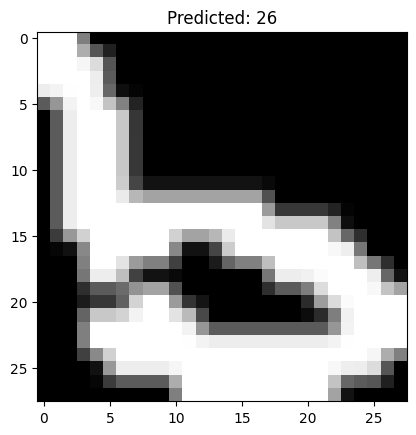

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


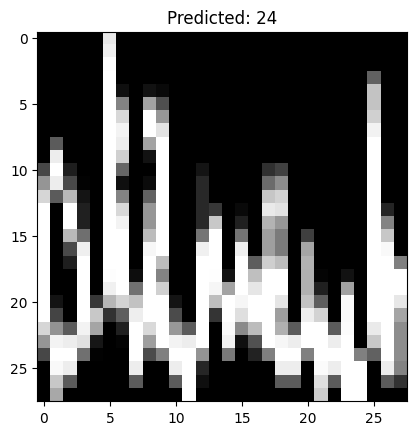

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


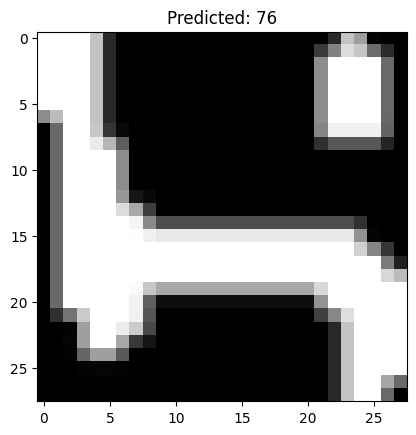

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


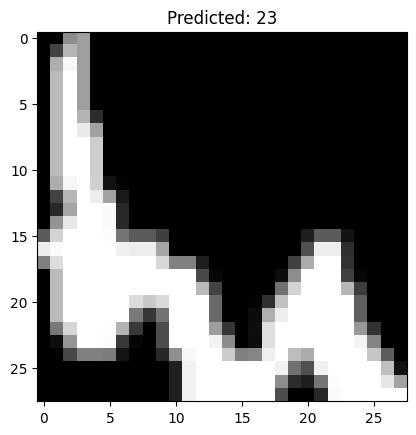

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


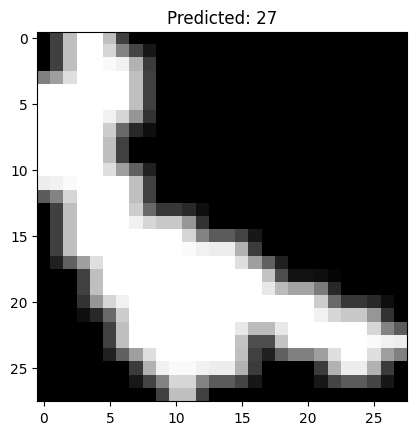

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


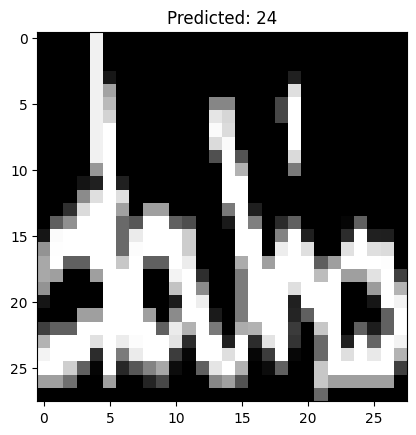

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


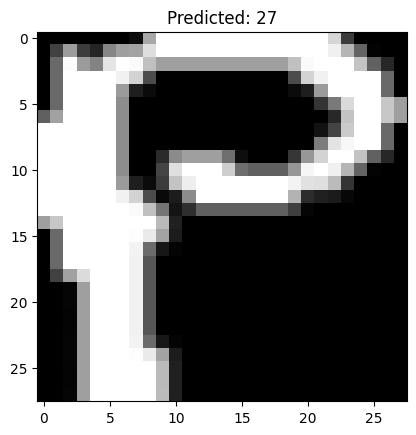

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


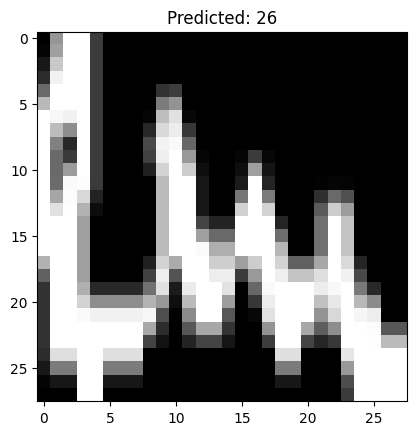

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


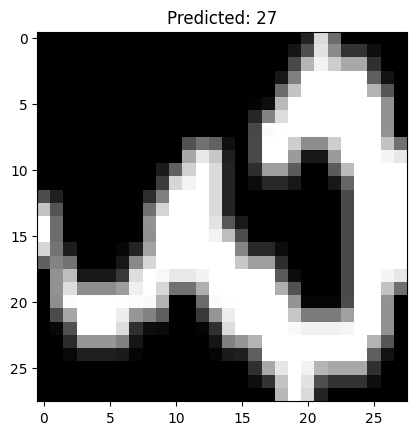

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


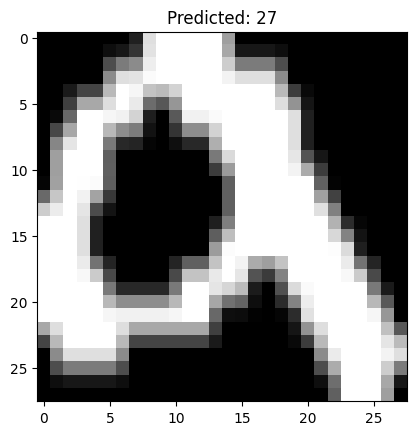

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


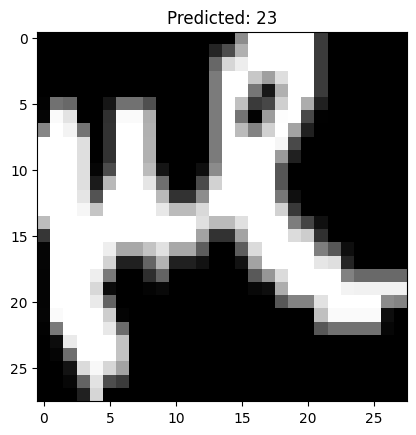

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


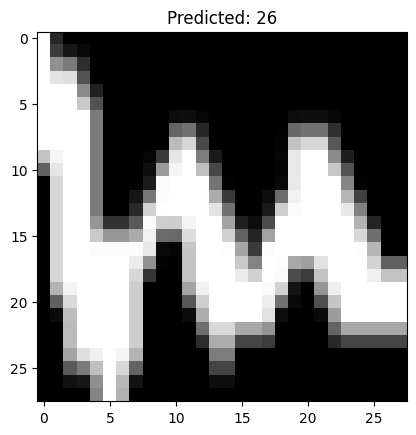

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


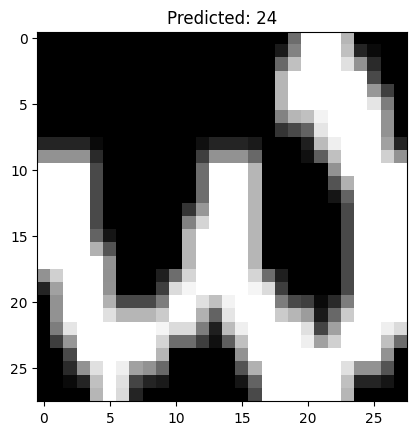

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


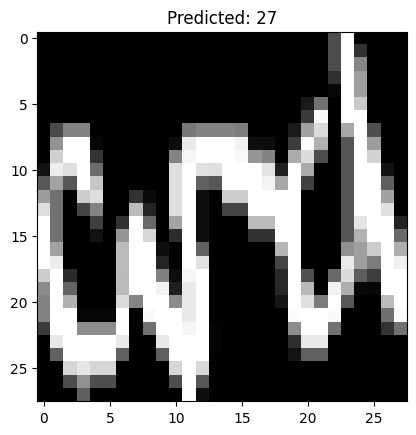

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


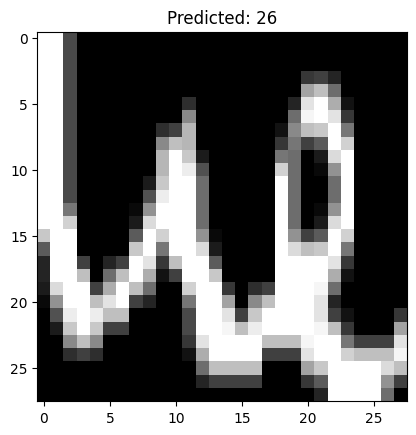

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


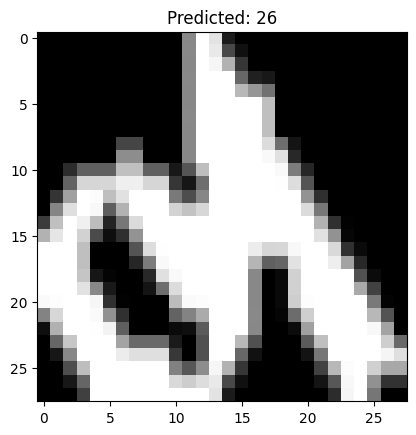

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


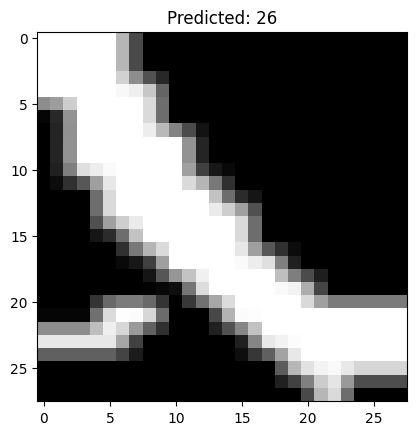

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


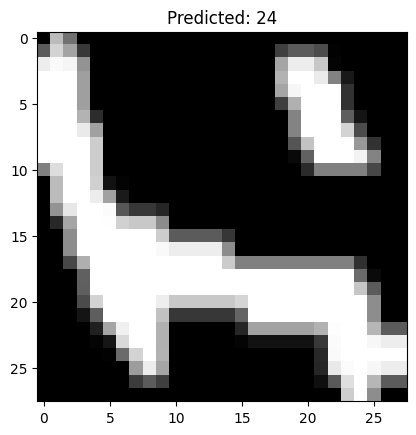

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


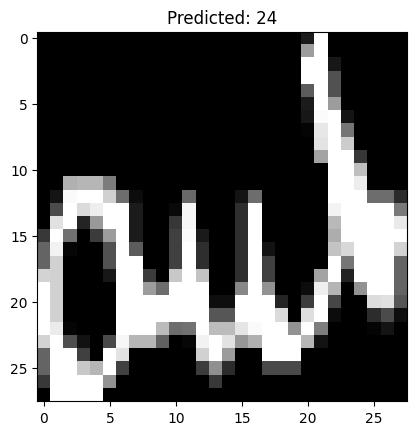

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


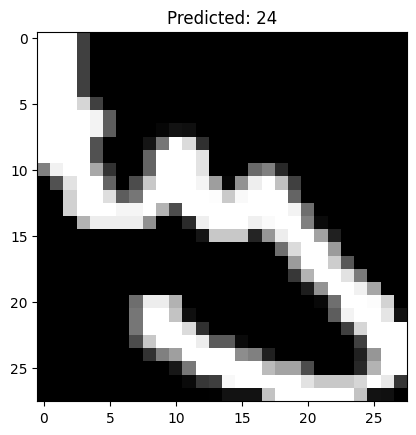

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


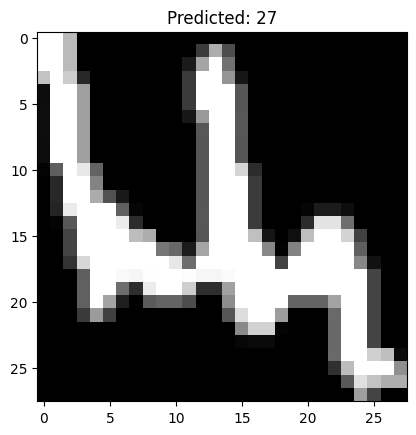

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


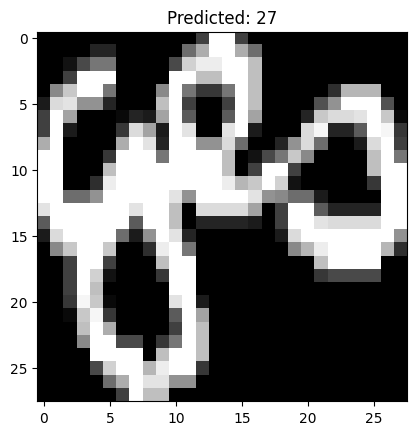

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


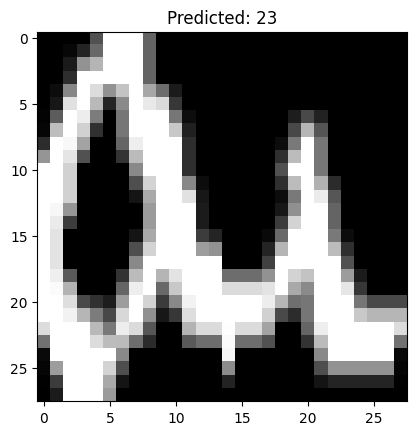

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


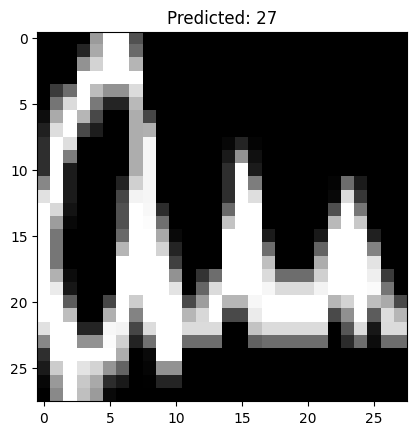

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


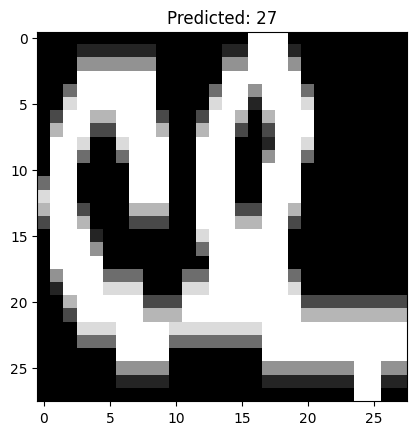

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


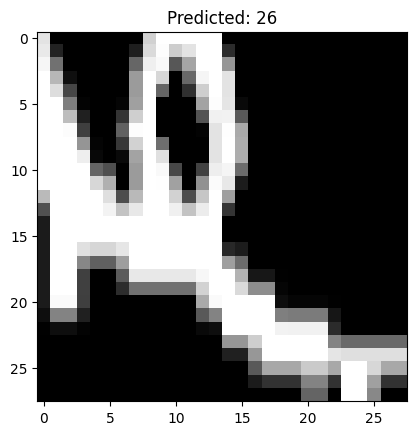

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


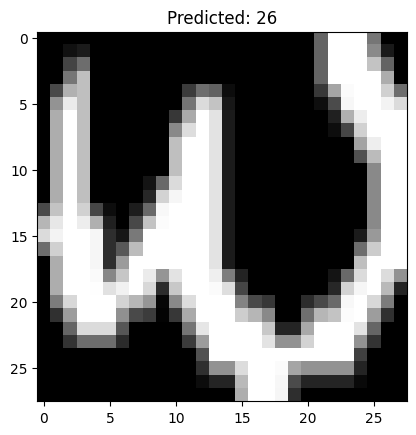

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


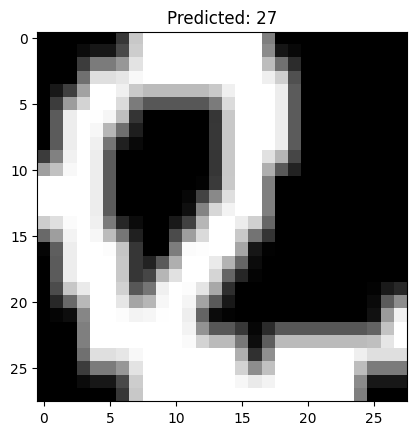

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


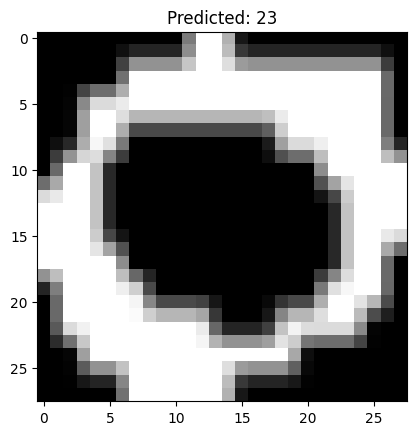

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


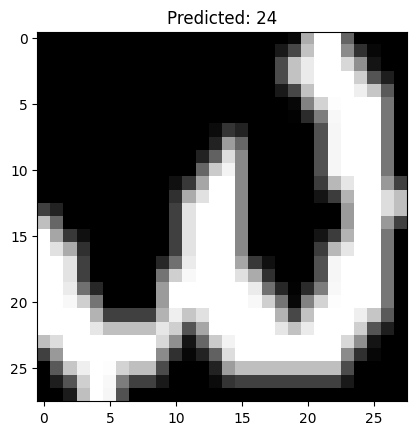

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


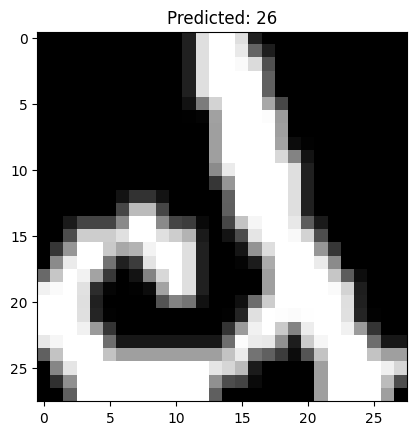

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


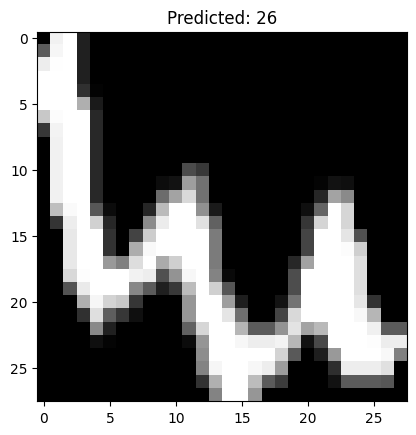

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


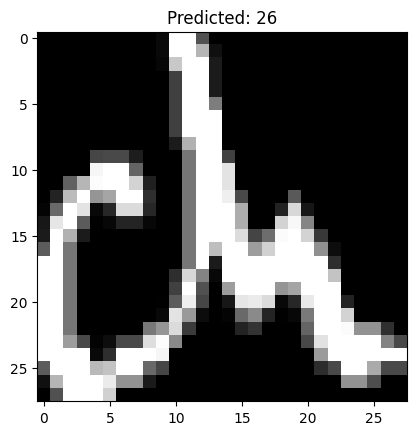

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


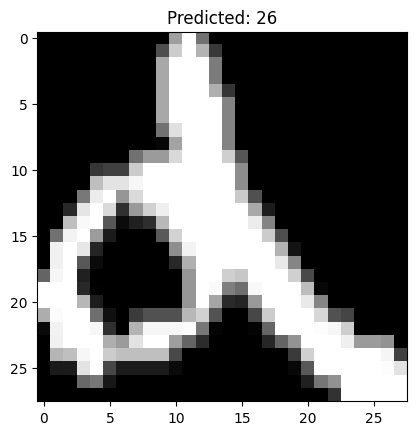

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


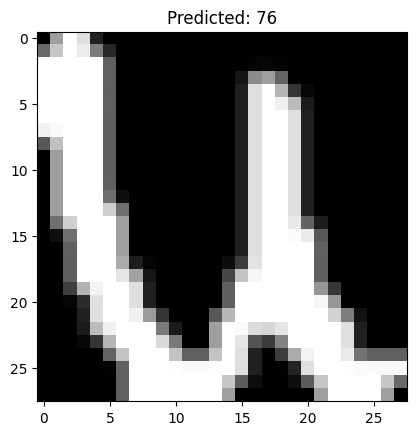

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


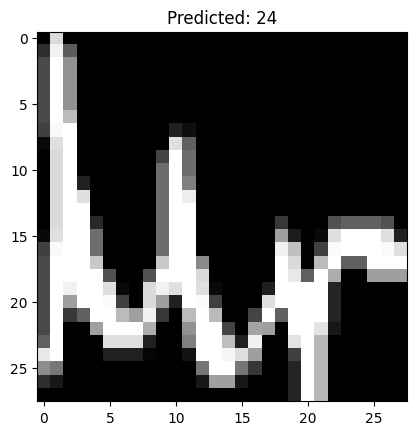

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


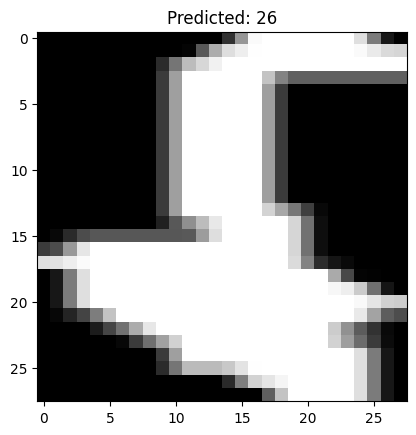

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


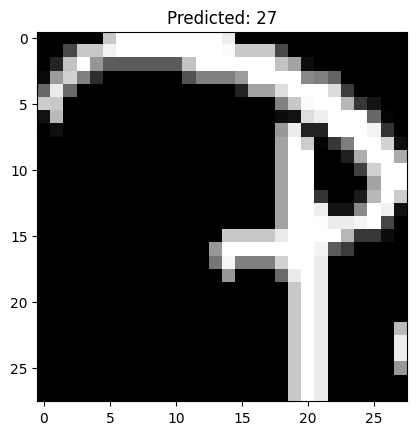

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


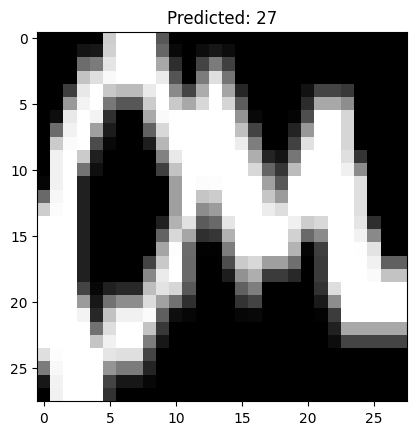

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


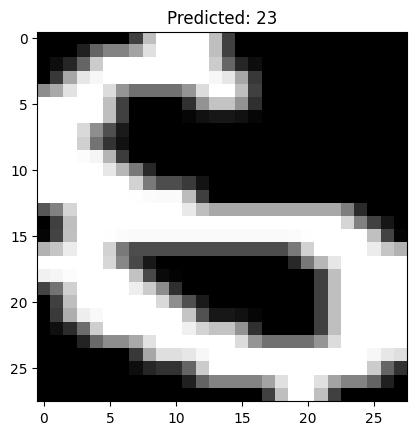

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


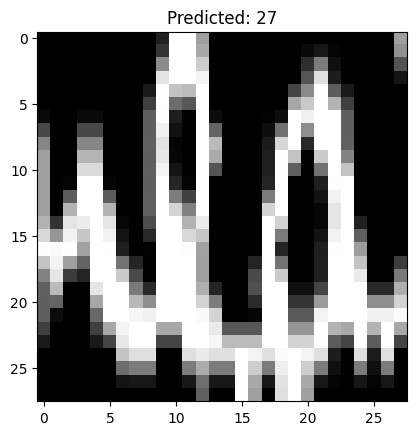

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


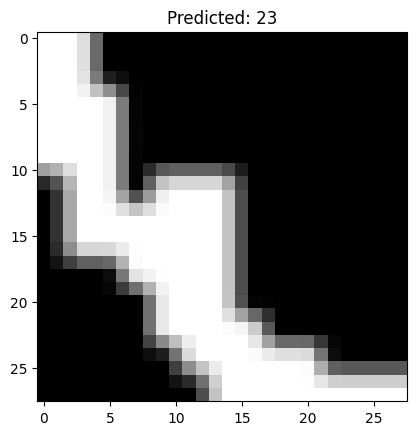

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


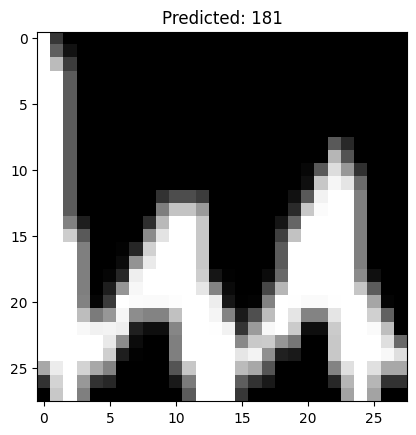

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


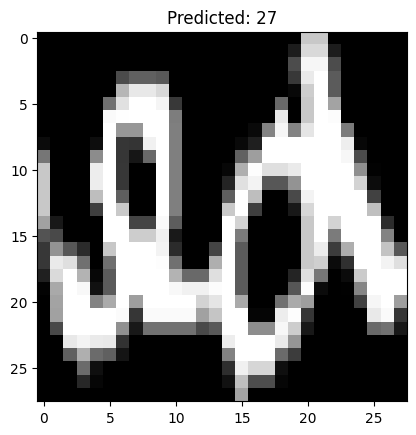

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


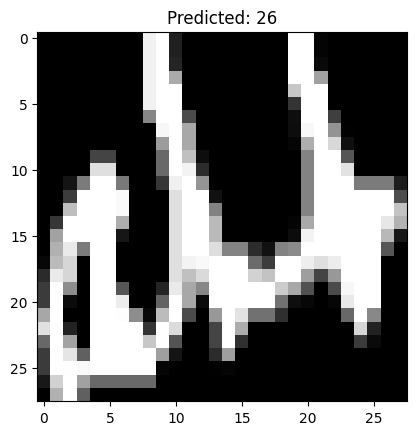

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


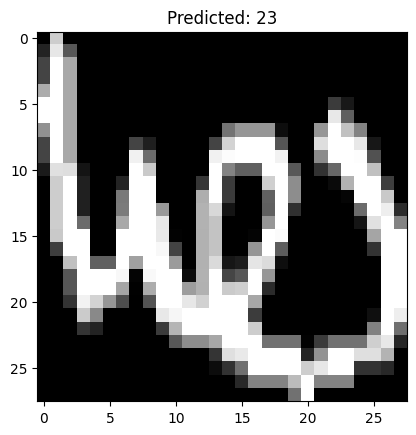

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


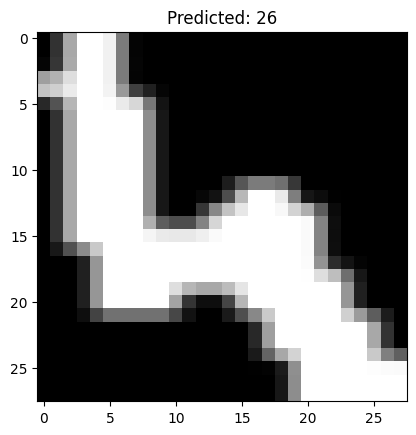

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


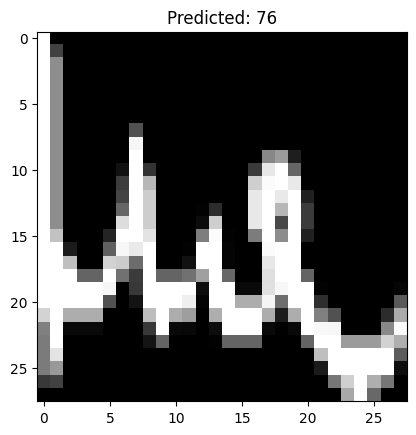

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


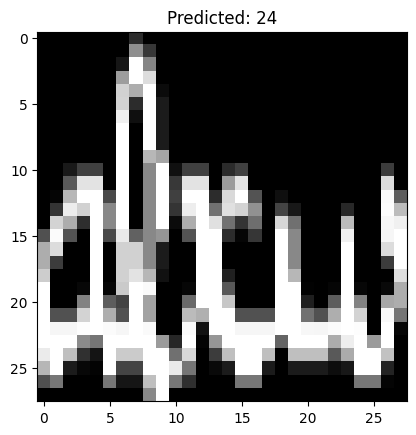

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


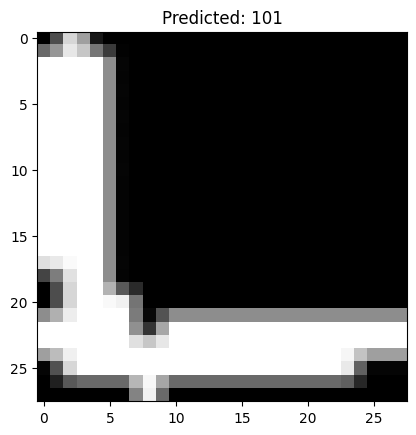

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


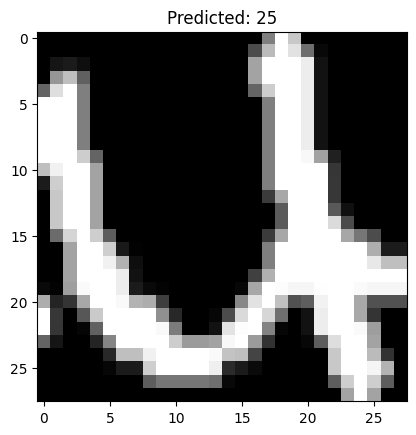

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


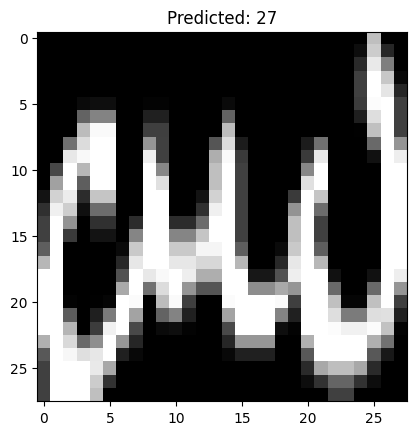

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


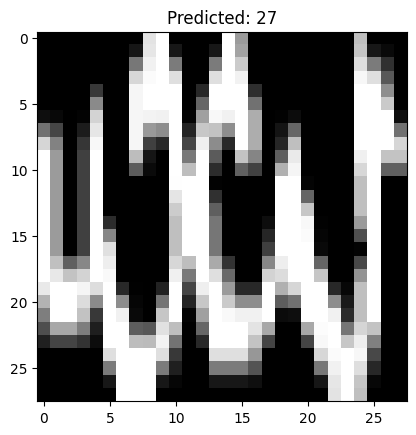

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


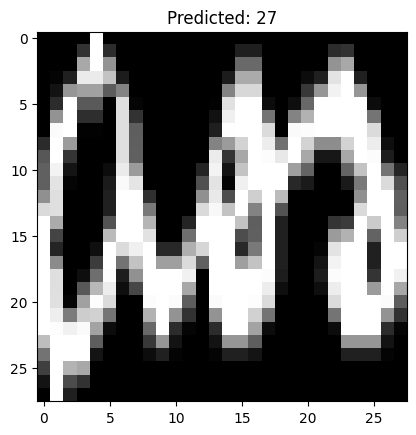

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


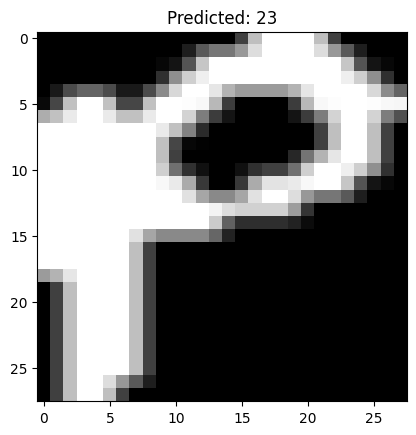

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


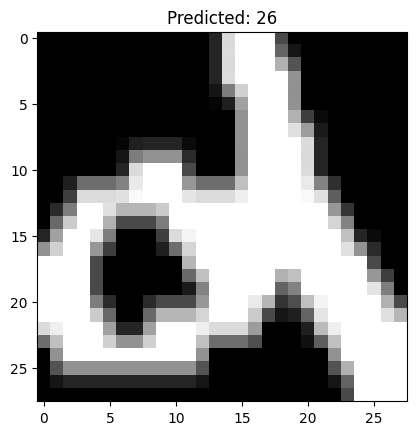

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


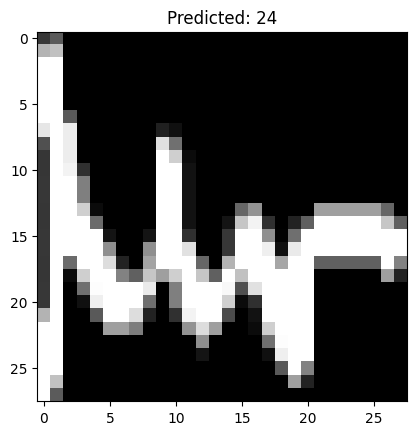

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


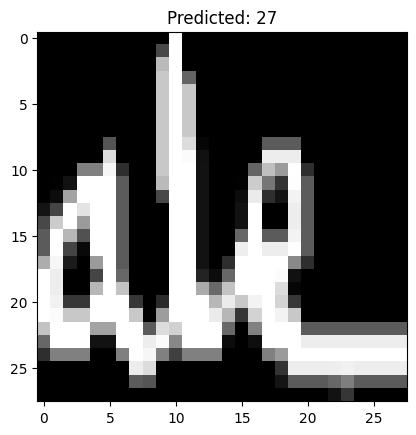

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


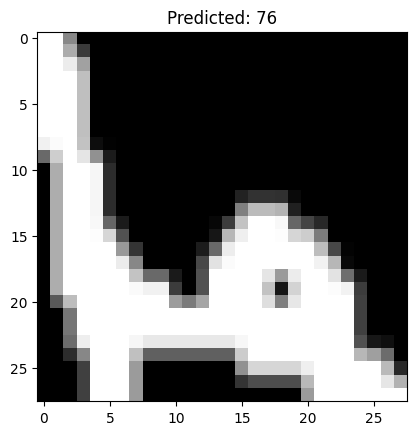

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


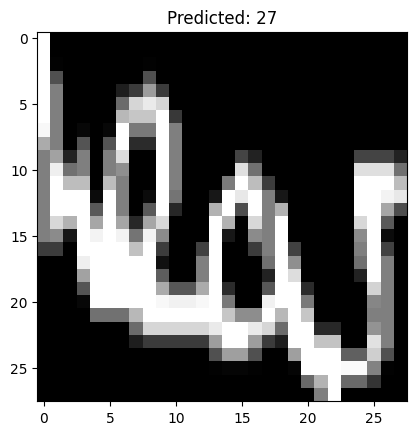

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


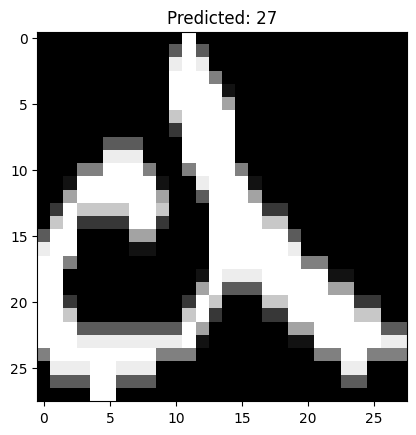

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


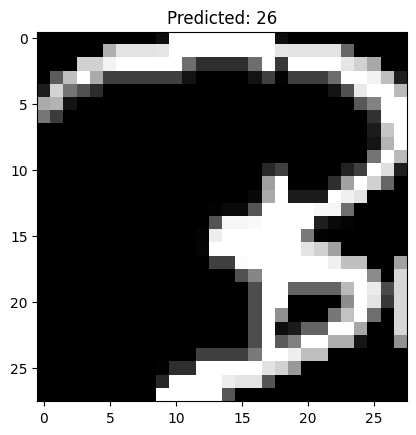

Predicted labels for the document: ['23', '27', '27', '27', '23', '26', '26', '27', '26', '27', '23', '76', '26', '26', '23', '23', '23', '25', '27', '27', '26', '24', '25', '27', '23', '26', '24', '27', '23', '24', '27', '24', '23', '27', '26', '24', '24', '24', '27', '23', '24', '26', '27', '23', '23', '76', '27', '23', '27', '26', '23', '23', '24', '24', '26', '76', '24', '27', '27', '27', '23', '25', '26', '26', '24', '76', '23', '27', '24', '27', '26', '27', '27', '23', '26', '24', '27', '26', '26', '26', '24', '24', '24', '27', '27', '23', '27', '27', '26', '26', '27', '23', '24', '26', '26', '26', '26', '76', '24', '26', '27', '27', '23', '27', '23', '181', '27', '26', '23', '26', '76', '24', '101', '25', '27', '27', '27', '23', '26', '24', '27', '76', '27', '27', '26']


In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model('/kaggle/working/best_model.keras')  # Assuming the model is already trained and available

# Load a sample document image
document_image_path = '/kaggle/input/graphology-dataset/images/images/000-18.png'  # Replace with the path to the document image
document_image = cv2.imread(document_image_path, cv2.IMREAD_GRAYSCALE)

# Preprocess the document image
_, binary_image = cv2.threshold(document_image, 150, 255, cv2.THRESH_BINARY_INV)

# Find contours of the characters in the document
contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# List to store predictions
predicted_labels = []

# Loop through each contour and process individual characters
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    if w > 10 and h > 10:  # Filter small contours (assume small contours are noise)
        # Extract the character from the document image
        character_image = binary_image[y:y + h, x:x + w]
        
        # Resize the character to 28x28 (required for the CNN model)
        resized_character = cv2.resize(character_image, (28, 28))
        
        # Normalize the pixel values to [0, 1]
        resized_character = resized_character / 255.0
        
        # Reshape to (28, 28, 1) to match the input shape of the model
        resized_character = resized_character.reshape(1, 28, 28, 1)
        
        # Predict the label using the trained CNN model
        prediction = model.predict(resized_character)
        predicted_class = np.argmax(prediction, axis=1)[0]
        
        # Decode the predicted class back to the label using LabelEncoder
        predicted_label = label_encoder.inverse_transform([predicted_class])[0]
        predicted_labels.append(predicted_label)

        # Optional: Display each character and its predicted label
        plt.imshow(resized_character.reshape(28, 28), cmap='gray')
        plt.title(f'Predicted: {predicted_label}')
        plt.show()

# Print all predicted labels
print("Predicted labels for the document:", predicted_labels)


In [10]:
# Assuming `predicted_labels` contains the predicted class indices
decoded_labels = label_encoder.inverse_transform([int(x) for x in predicted_labels])

# Print the decoded labels
print("Decoded Predicted Labels for the Document:", decoded_labels)


Decoded Predicted Labels for the Document: ['119' '122' '122' '122' '119' '121' '121' '122' '121' '122' '119' '167'
 '121' '121' '119' '119' '119' '120' '122' '122' '121' '12' '120' '122'
 '119' '121' '12' '122' '119' '12' '122' '12' '119' '122' '121' '12' '12'
 '12' '122' '119' '12' '121' '122' '119' '119' '167' '122' '119' '122'
 '121' '119' '119' '12' '12' '121' '167' '12' '122' '122' '122' '119'
 '120' '121' '121' '12' '167' '119' '122' '12' '122' '121' '122' '122'
 '119' '121' '12' '122' '121' '121' '121' '12' '12' '12' '122' '122' '119'
 '122' '122' '121' '121' '122' '119' '12' '121' '121' '121' '121' '167'
 '12' '121' '122' '122' '119' '122' '119' '261' '122' '121' '119' '121'
 '167' '12' '19' '120' '122' '122' '122' '119' '121' '12' '122' '167'
 '122' '122' '121']


In [11]:
# List to store predictions
predicted_labels = []

# Loop through each contour and process individual characters
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    if w > 10 and h > 10:  # Filter small contours (assume small contours are noise)
        # Extract the character from the document image
        character_image = binary_image[y:y + h, x:x + w]
        
        # Resize the character to 28x28 (required for the CNN model)
        resized_character = cv2.resize(character_image, (28, 28))
        
        # Normalize the pixel values to [0, 1]
        resized_character = resized_character / 255.0
        
        # Reshape to (28, 28, 1) to match the input shape of the model
        resized_character = resized_character.reshape(1, 28, 28, 1)
        
        # Predict the label using the loaded CNN model
        prediction = model.predict(resized_character)
        predicted_class = np.argmax(prediction, axis=1)[0]
        
        # Append the predicted class index (as an integer) to the list
        predicted_labels.append(predicted_class)

        # Print the predicted class index for debugging
        print(f"Predicted class index: {predicted_class}")

# Print predicted labels before decoding
print(f"Predicted class indices: {predicted_labels}")

# Convert predicted class indices (integers) back to human-readable labels using LabelEncoder
decoded_labels = label_encoder.inverse_transform(predicted_labels)

# Print the decoded predicted labels (actual human-readable labels)
print("Decoded Predicted Labels for the Document:", decoded_labels)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class index: 146
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Predicted class index: 190
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted class index: 190
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Predicted class index: 190
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted class index: 146
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted class index: 179
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class index: 179
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted class index: 190
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Predicted class index: 179
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Predicted class index: 190
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted class index: 146
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Predicted class index: 253
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Predicted class index: 179
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted class index: 179
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Predicted class index: 146
1/1 ━━━━━━━━━━━━━━━━━━━━ 